In [1]:
# fundamentals
import os, glob, sys
import numpy as np
import pandas as pd
from calendar import monthrange, month_name
import datetime
import imp

# plotting libraries and setup
from matplotlib.colors import BoundaryNorm
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='serif')
plt.rc('font', size=14)
plt.rc('facecolor', )

# met mast functions and utilities
sys.path.append('../')
import met_funcs as MET
import vis
import utils

In [2]:
# paths (must mount volume smb://nrel.gov/shared/wind/WindWeb/MetData/135mData/)
towerID = 'M5'
datapath = '../example_data/'
figPath = '../../figs/{}'.format(towerID)
try:
    os.makedirs(figPath)
except:
    pass

# Data loading 

Data located in '../example_data/' has already been filtered orgainzed and qc'd.

If loading raw data (still needing to be qc'd and filtered), refer to 'M5_figs_process.ipyng' for proceedure.

In [3]:
fPaths = os.listdir(datapath)

for ifile, file in enumerate(fPaths):
    loadfile = os.path.join(datapath,file)
    
    temp = pd.read_csv(loadfile)
    
    if ifile==0:
        metdat = temp
    else:
        metdat = metdat.append(temp)

# Reindex with date
metdat.set_index('Date', inplace=True)
metdat.index = pd.to_datetime(metdat.index)
metdat.sort_index(inplace=True)
catinfo = MET.get_catinfo(metdat)

In [6]:
nrelcolors = utils.get_nrelcolors()
nrelblue = nrelcolors['blue'][0]
nrelred = nrelcolors['red'][1]

In [ ]:
vloc = [40, 87, 130]
for loc in vloc:
    fig,ax = vis.hist(metdat, catinfo, 'speed', vertloc=loc, fit='Weibull')
#     fig.savefig(os.path.join(figPath,'speed_hist_{}m_fit.png'.format(loc)), bbox_inches='tight', dpi=200)

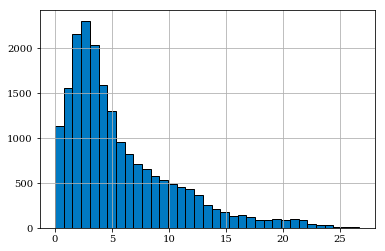

In [19]:
spdcol, vertloc, _= utils.get_vertical_locations(catinfo['columns']['speed'], location=87)
spdbymonth = metdat[spdcol].groupby(metdat.index.month)

for month in range(1,2):
    temp = spdbymonth.get_group(month).dropna()
    fig, ax = plt.subplots()
    temp.hist(ax=ax, bins=35, color=nrelblue, edgecolor='k')
#     fig,ax = vis.hist(temp, catinfo, 'speed',87)

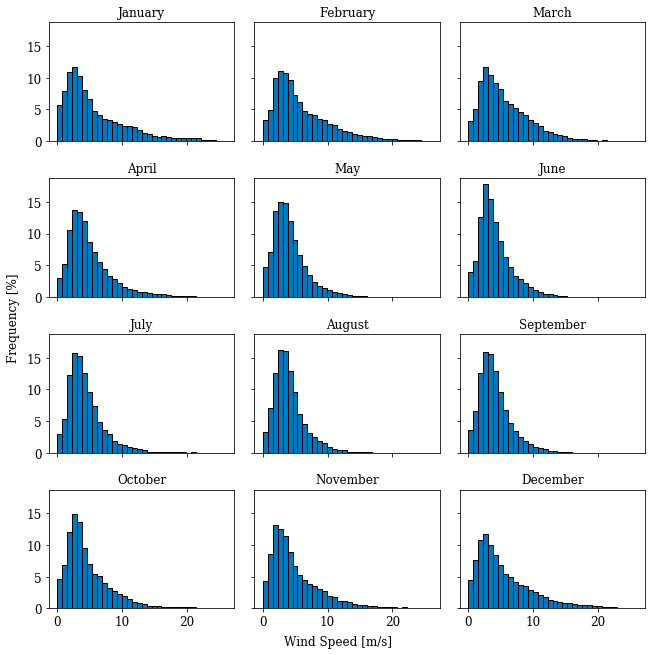

In [33]:
fig,ax = vis.monthly_hist(metdat, catinfo, 'speed', vertloc=87)

/Users/nhamilto/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1301: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


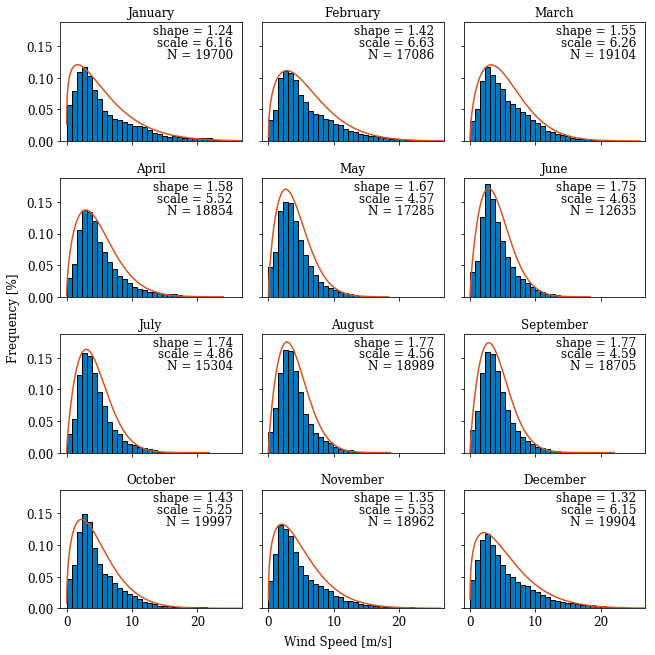

In [100]:
imp.reload(vis)
fig,ax = vis.monthly_hist(metdat, catinfo, 'speed', vertloc=87, fit='Weibull')
fig.savefig(os.path.join(figPath,'monthly_speed_hist_fits.png'), bbox_inches='tight', dpi=200)

In [26]:

# fig,ax = vis.hist(metdat, catinfo, 'air pressure', vertloc=38, fit='skewedgaussian')

/Users/nhamilto/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1301: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


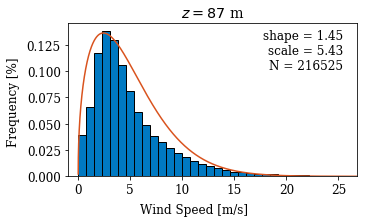

In [101]:
fig,ax = vis.hist(metdat, catinfo, 'speed', vertloc=87, fit='Weibull')
fig.savefig(os.path.join(figPath,'{}_hist_fits.png'.format(catinfo['save']['speed'])), bbox_inches='tight', dpi=200)

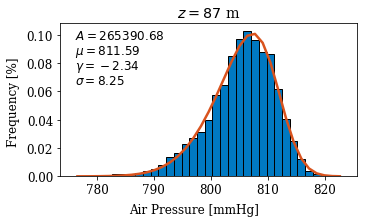

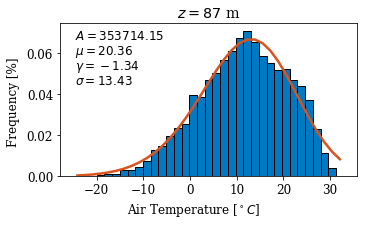

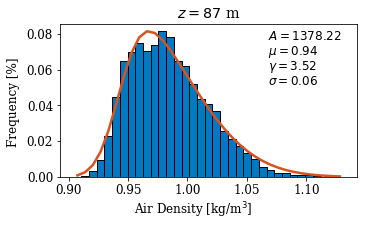

In [36]:
cats = ['air pressure','air temperature','air density']
for cat in cats:
    fig,ax = vis.hist(metdat, catinfo, cat, vertloc=87, fit='skewedgaussian')
    fig.savefig(os.path.join(figPath,'{}_hist_fits.png'.format(catinfo['save'][cat])), bbox_inches='tight', dpi=200)

In [41]:
months = utils.monthnames()

winter = metdat[(metdat.index.month >= 1) & (metdat.index.month <= 3)]
spring = metdat[(metdat.index.month >= 4) & (metdat.index.month <= 6)]
summer = metdat[(metdat.index.month >= 7) & (metdat.index.month <= 9)]
autumn = metdat[(metdat.index.month >= 10) & (metdat.index.month <= 12)]

/Users/nhamilto/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1301: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


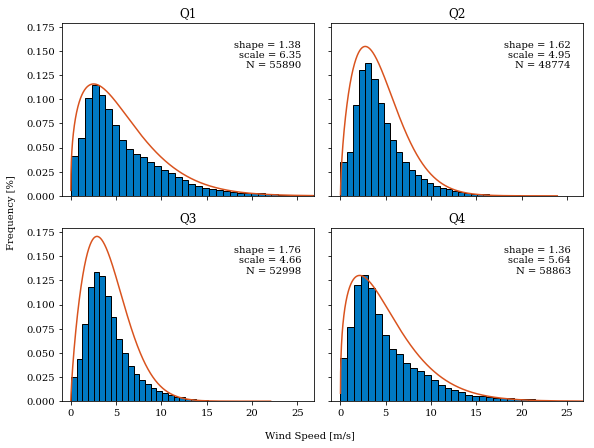

In [8]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(8,6))
dcol,_,_ = utils.get_vertical_locations(catinfo['columns']['speed'], location=87)

for ii in range(4):

    startmonth = ii*3+1
    stopmonth = startmonth+2

    subdat = metdat[(metdat.index.month >= startmonth) & (metdat.index.month <= stopmonth)]

    dat1 = subdat[dcol].dropna()
    dat1.hist(ax=ax.flatten()[ii], bins=35, facecolor=nrelblue, edgecolor='k', weights=np.ones(len(dat1))/len(dat1))
    vis.fit_weibull(dat1, ax=ax.flatten()[ii])
    ax.flatten()[ii].grid(False)
    ax.flatten()[ii].set_title(r'Q{}'.format(ii+1))

fig.text(0.5,-0.025, catinfo['labels']['speed'], ha='center')
fig.text(-0.025,0.5, 'Frequency [%]', rotation='vertical', va='center')

fig.tight_layout()

# fig.savefig(os.path.join(figPath,'speed_hist_seasonal_fits.png'), bbox_inches='tight', dpi=200)

In [ ]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(8,6))
dcol,_,_ = utils.get_vertical_locations(catinfo['columns']['speed'], location=87)

dat1 = winter[dcol].dropna()
dat1.hist(ax=ax.flatten()[0], bins=35, facecolor=nrelblue, edgecolor='k', weights=np.ones(len(dat1))/len(dat1))
vis.fit_weibull(dat1, ax=ax.flatten()[0])
ax.flatten()[0].grid(False)
ax.flatten()[0].set_title('Jan-Mar')

dat1 = spring[dcol].dropna()
dat1.hist(ax=ax.flatten()[1], bins=35, facecolor=nrelblue, edgecolor='k', weights=np.ones(len(dat1))/len(dat1))
vis.fit_weibull(dat1, ax=ax.flatten()[1])
ax.flatten()[1].grid(False)
ax.flatten()[1].set_title('Apr-Jun')

dat1 = summer[dcol].dropna()
dat1.hist(ax=ax.flatten()[2], bins=35, facecolor=nrelblue, edgecolor='k', weights=np.ones(len(dat1))/len(dat1))
vis.fit_weibull(dat1, ax=ax.flatten()[2])
ax.flatten()[2].grid(False)
ax.flatten()[2].set_title('Jul-Sep')

dat1 = autumn[dcol].dropna()
dat1.hist(ax=ax.flatten()[3], bins=35, facecolor=nrelblue, edgecolor='k', weights=np.ones(len(dat1))/len(dat1))
vis.fit_weibull(dat1, ax=ax.flatten()[3])
ax.flatten()[3].grid(False)
ax.flatten()[3].set_title('Oct-Dec')

fig.text(0.5,-0.025, catinfo['labels']['speed'], ha='center')
fig.text(-0.025,0.5, 'Frequency [%]', rotation='vertical', va='center')

fig.tight_layout()

fig.savefig(os.path.join(figPath,'speed_hist_seasonal_fits.png'), bbox_inches='tight', dpi=200)

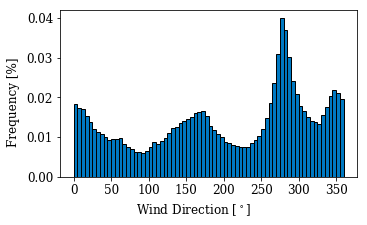

In [100]:
imp.reload(vis)
fig,ax = vis.hist(metdat, catinfo, 'direction', vertloc=87, bins=72)
fig.savefig(os.path.join(figPath,'dir_hist.png'), bbox_inches='tight', dpi=200)

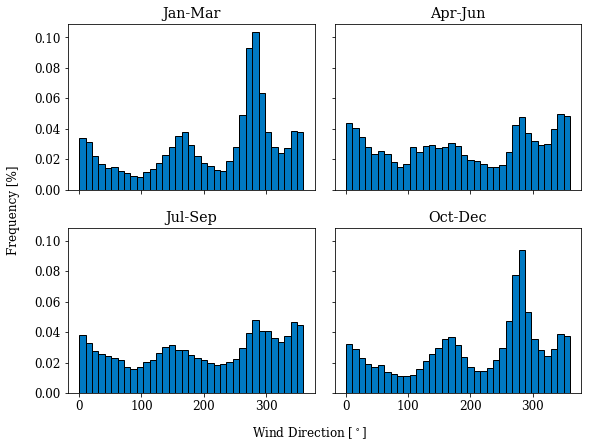

In [69]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(8,6))
dcol,_,_ = utils.get_vertical_locations(catinfo['columns']['direction'], location=87)

dat1 = winter[dcol].dropna()
dat1.hist(ax=ax.flatten()[0], bins=35, facecolor=nrelblue, edgecolor='k', weights=np.ones(len(dat1))/len(dat1))
# vis.fit_weibull(dat1, ax=ax.flatten()[0])
ax.flatten()[0].grid(False)
ax.flatten()[0].set_title('Jan-Mar')

dat1 = spring[dcol].dropna()
dat1.hist(ax=ax.flatten()[1], bins=35, facecolor=nrelblue, edgecolor='k', weights=np.ones(len(dat1))/len(dat1))
# vis.fit_weibull(dat1, ax=ax.flatten()[1])
ax.flatten()[1].grid(False)
ax.flatten()[1].set_title('Apr-Jun')

dat1 = summer[dcol].dropna()
dat1.hist(ax=ax.flatten()[2], bins=35, facecolor=nrelblue, edgecolor='k', weights=np.ones(len(dat1))/len(dat1))
# vis.fit_weibull(dat1, ax=ax.flatten()[2])
ax.flatten()[2].grid(False)
ax.flatten()[2].set_title('Jul-Sep')

dat1 = autumn[dcol].dropna()
dat1.hist(ax=ax.flatten()[3], bins=35, facecolor=nrelblue, edgecolor='k', weights=np.ones(len(dat1))/len(dat1))
# vis.fit_weibull(dat1, ax=ax.flatten()[3])
ax.flatten()[3].grid(False)
ax.flatten()[3].set_title('Oct-Dec')

fig.text(0.5,-0.025, catinfo['labels']['direction'], ha='center')
fig.text(-0.025,0.5, 'Frequency [%]', rotation='vertical', va='center')

fig.tight_layout()

fig.savefig(os.path.join(figPath,'direction_hist_seasonal.png'), bbox_inches='tight', dpi=200)

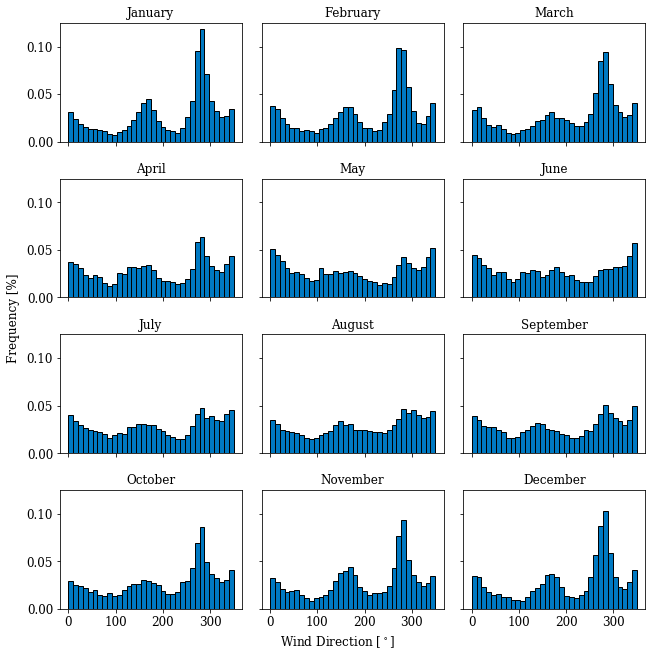

In [73]:
fig,ax = vis.monthly_hist(metdat, catinfo, 'direction', vertloc=87)
fig.savefig(os.path.join(figPath,'direction_hist_monthly.png'), bbox_inches='tight', dpi=200)

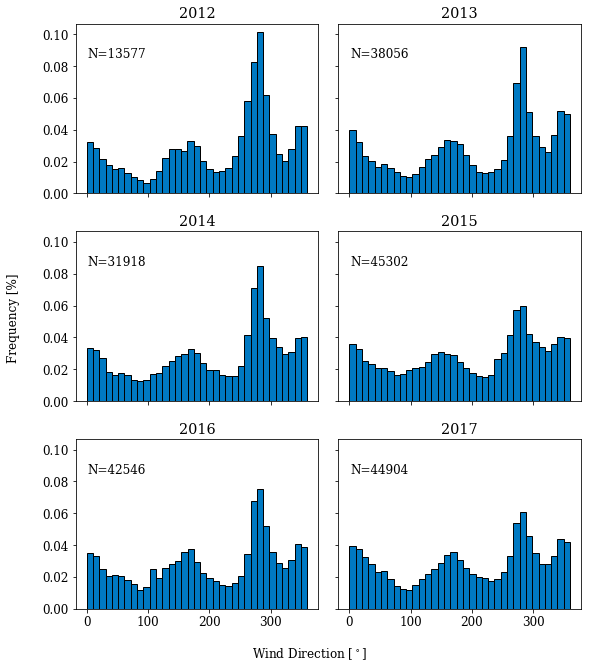

In [94]:
years = metdat.index.year.value_counts().index.values
years.sort()
dcol,_,_ = utils.get_vertical_locations(catinfo['columns']['direction'], location=87)

fig, ax = plt.subplots(3,2, sharex=True, sharey=True, figsize=(8,9))
yeardat = metdat[dcol].groupby(metdat.index.year)

for iy, year in enumerate(years):
    dat1 = yeardat.get_group(year).dropna()
    dat1.hist(ax=ax.flatten()[iy], bins=35, facecolor=nrelblue, edgecolor='k', weights=np.ones(len(dat1))/len(dat1))
    ax.flatten()[iy].set_title(year)
    ax.flatten()[iy].grid(False)
    ax.flatten()[iy].annotate('N={}'.format(len(dat1)), xy=(0.05,0.8), xycoords='axes fraction')
    
fig.text(0.5,-0.025, catinfo['labels']['direction'], ha='center')
fig.text(-0.025,0.5, 'Frequency [%]', rotation='vertical', va='center')
fig.tight_layout()

fig.savefig(os.path.join(figPath,'direction_hist_annual.png'), bbox_inches='tight', dpi=200)

In [97]:
imp.reload(vis)

<module 'vis' from '../vis.py'>

/Users/nhamilto/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1301: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


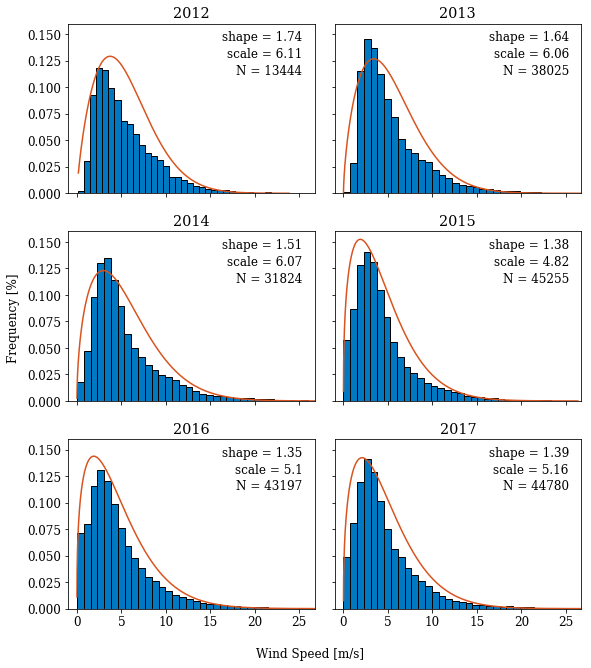

In [99]:
years = metdat.index.year.value_counts().index.values
years.sort()
dcol,_,_ = utils.get_vertical_locations(catinfo['columns']['speed'], location=87)

fig, ax = plt.subplots(3,2, sharex=True, sharey=True, figsize=(8,9))
yeardat = metdat[dcol].groupby(metdat.index.year)

for iy, year in enumerate(years):
    dat1 = yeardat.get_group(year).dropna()
    dat1.hist(ax=ax.flatten()[iy], bins=35, facecolor=nrelblue, edgecolor='k', weights=np.ones(len(dat1))/len(dat1))
    vis.fit_weibull(dat1, ax=ax.flatten()[iy])
    ax.flatten()[iy].set_title(year)
    ax.flatten()[iy].grid(False)
#     ax.flatten()[iy].annotate('N={}'.format(len(dat1)), xy=(0.05,0.8), xycoords='axes fraction')
    
fig.text(0.5,-0.025, catinfo['labels']['speed'], ha='center')
fig.text(-0.025,0.5, 'Frequency [%]', rotation='vertical', va='center')
fig.tight_layout()

fig.savefig(os.path.join(figPath,'speed_hist_annual_fits.png'), bbox_inches='tight', dpi=200)

# Cut by TI


In [104]:
turbclasses = np.linspace(0,50,6)
turbcol, probe_heights, _ = utils.get_vertical_locations(catinfo['columns']['ti'], 87)

metdat['turbclass'] = pd.cut(metdat[turbcol], turbclasses, include_lowest=False).astype(str)
metdat['turbclass'].value_counts()

temp = metdat.groupby('turbclass')
turbclasses = list(temp.groups.keys())[:-1]
lowTI = temp.get_group(turbclasses[0])

In [114]:
plotcats = ['air density',
            'air pressure',
            'air temperature',
            'direction',
            'relative humidity',
            'speed',
            'wind shear',
            'wind veer']
lowtifigpath = '../../figs/lowTI'
try:
    os.makedirs(lowtifigpath)
except:
    pass

/Users/nhamilto/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1301: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


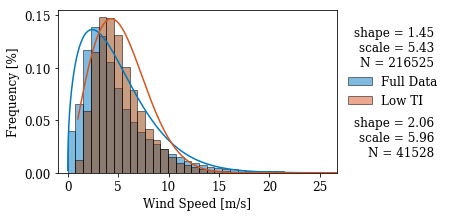

In [143]:
nrelcolors = utils.get_nrelcolors()
imp.reload(vis)

plotcats = ['air density',
            'air pressure',
            'air temperature',
            'direction',
            'relative humidity',
            'speed',
            'wind shear',
            'wind veer']

for cat in ['speed']:#plotcats:
    
    height = 87
    if 'shear' in cat.lower():
        height = 110

    plotvar, _, _ = utils.get_vertical_locations(catinfo['columns'][cat], height)

    fulldat = metdat[plotvar].dropna()#.sort_values()
#     fulldat = MET.reject_outliers(fulldat,m=4)
    lowtidat = lowTI[plotvar].dropna()#.sort_values()
#     lowtidat = MET.reject_outliers(lowtidat,m=4)
    
    result = pd.concat([fulldat, lowtidat], axis=1)
    fig, ax = plt.subplots(figsize=(5,3))
    
    binwidth = np.round((fulldat.max()-fulldat.min())/35.0,decimals=3)
    bins = np.arange(fulldat.min(), fulldat.max(), binwidth)
    
    h1 = fulldat.plot.hist(bins = bins, 
                        color=nrelcolors['blue'][0],
                        edgecolor='k',
                        alpha=0.5,
                        ax=ax,
                        weights=np.ones(len(fulldat))/len(fulldat),
                        legend=False, label='fulldat')
    vis.fit_weibull(fulldat, ax=ax, basecolor='blue', xy = (1.35,0.90))
    
    h2 = lowtidat.plot.hist(bins = bins, 
                        color=nrelcolors['red'][0],
                        edgecolor='k',
                        alpha=0.5,
                        ax=ax,
                        weights=np.ones(len(lowtidat))/len(lowtidat), 
                        legend=False, label='lowti')
    vis.fit_weibull(lowtidat, ax=ax, basecolor='red', xy = (1.35,0.35))

    # proxy artists
    from matplotlib.patches import Rectangle
    handles = [Rectangle((0,0),1,1,color=c,ec="k",alpha=0.5) for c in [nrelblue,nrelred]]
    labels= ['Full Data', 'Low TI']
    plt.legend(handles, labels,frameon=False, loc=6, bbox_to_anchor=(1,0.5))
           
    ax.set_xlabel(catinfo['labels'][cat])
    ax.set_ylabel('Frequency [%]')
#     leg = ax.legend((h1, h2),('Full Data', 'Low TI'), frameon=False, loc=6, bbox_to_anchor=(1,0.5))
    
    fig.savefig(os.path.join(lowtifigpath,'LOWTI_{}_hist_comp.png'.format(catinfo['save'][cat])),dpi=200,bbox_inches='tight')
    
#     plt.clf()
    

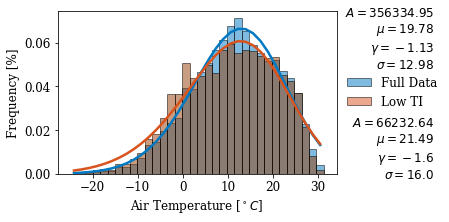

In [176]:
nrelcolors = utils.get_nrelcolors()
imp.reload(vis)

plotcats = ['air density',
            'air pressure',
            'air temperature',
            'relative humidity']

for cat in plotcats[2:3]:
    
    height = 87
    if 'shear' in cat.lower():
        height = 110

    plotvar, _, _ = utils.get_vertical_locations(catinfo['columns'][cat], height)

    fulldat = metdat[plotvar].dropna().sort_values()
    lowtidat = lowTI[plotvar].dropna().sort_values()

    
    result = pd.concat([fulldat, lowtidat], axis=1)
    fig, ax = plt.subplots(figsize=(5,3))
    
    binwidth = np.round((fulldat.max()-fulldat.min())/35.0,decimals=3)
    bins = np.arange(fulldat.min(), fulldat.max(), binwidth)
    
    h1 = fulldat.plot.hist(bins = bins, 
                        color=nrelcolors['blue'][0],
                        edgecolor='k',
                        alpha=0.5,
                        ax=ax,
                        weights=np.ones(len(fulldat))/len(fulldat),
                        legend=False, label='fulldat')
    vis.fit_skewedgaussian(fulldat, bins=bins, ax=ax, basecolor='blue', xy = (1.35,1.025), gamma=10)
    
    h2 = lowtidat.plot.hist(bins = bins, 
                        color=nrelcolors['red'][0],
                        edgecolor='k',
                        alpha=0.5,
                        ax=ax,
                        weights=np.ones(len(lowtidat))/len(lowtidat), 
                        legend=False, label='lowti')
    vis.fit_skewedgaussian(lowtidat, bins=bins, ax=ax, basecolor='red', xy = (1.35,0.35))

    # proxy artists
    from matplotlib.patches import Rectangle
    handles = [Rectangle((0,0),1,1,color=c,ec="k",alpha=0.5) for c in [nrelblue,nrelred]]
    labels= ['Full Data', 'Low TI']
    plt.legend(handles, labels,frameon=False, loc=6, bbox_to_anchor=(1,0.5))
           
    ax.set_xlabel(catinfo['labels'][cat])
    ax.set_ylabel('Frequency [%]')
    
    fig.savefig(os.path.join(lowtifigpath,'LOWTI_{}_hist_comp.png'.format(catinfo['save'][cat])),dpi=200,bbox_inches='tight')
    
#     plt.clf()
    

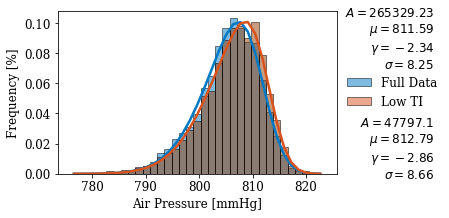

In [175]:
nrelcolors = utils.get_nrelcolors()
imp.reload(vis)

plotcats = ['air density',
            'air pressure',
            'air temperature',
            'relative humidity']

for cat in plotcats[1:2]:
    
    height = 87
    if 'shear' in cat.lower():
        height = 110

    plotvar, _, _ = utils.get_vertical_locations(catinfo['columns'][cat], height)

    fulldat = metdat[plotvar].dropna().sort_values()
    lowtidat = lowTI[plotvar].dropna().sort_values()

    
    result = pd.concat([fulldat, lowtidat], axis=1)
    fig, ax = plt.subplots(figsize=(5,3))
    
    binwidth = np.round((fulldat.max()-fulldat.min())/35.0,decimals=3)
    bins = np.arange(fulldat.min(), fulldat.max(), binwidth)
    
    h1 = fulldat.plot.hist(bins = bins, 
                        color=nrelcolors['blue'][0],
                        edgecolor='k',
                        alpha=0.5,
                        ax=ax,
                        weights=np.ones(len(fulldat))/len(fulldat),
                        legend=False, label='fulldat')
    vis.fit_skewedgaussian(fulldat, bins=bins, ax=ax, basecolor='blue', xy = (1.35,1.025), gamma=-0.5)
    
    h2 = lowtidat.plot.hist(bins = bins, 
                        color=nrelcolors['red'][0],
                        edgecolor='k',
                        alpha=0.5,
                        ax=ax,
                        weights=np.ones(len(lowtidat))/len(lowtidat), 
                        legend=False, label='lowti')
    vis.fit_skewedgaussian(lowtidat, bins=bins, ax=ax, basecolor='red', xy = (1.35,0.35), gamma=-2)

    # proxy artists
    from matplotlib.patches import Rectangle
    handles = [Rectangle((0,0),1,1,color=c,ec="k",alpha=0.5) for c in [nrelblue,nrelred]]
    labels= ['Full Data', 'Low TI']
    plt.legend(handles, labels,frameon=False, loc=6, bbox_to_anchor=(1,0.5))
           
    ax.set_xlabel(catinfo['labels'][cat])
    ax.set_ylabel('Frequency [%]')
    
    fig.savefig(os.path.join(lowtifigpath,'LOWTI_{}_hist_comp.png'.format(catinfo['save'][cat])),dpi=200,bbox_inches='tight')
    
#     plt.clf()
    

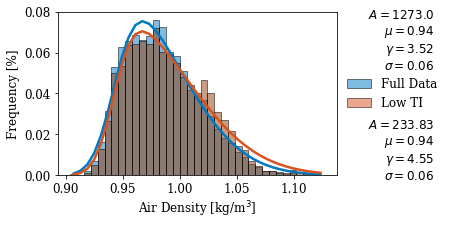

In [177]:
nrelcolors = utils.get_nrelcolors()
imp.reload(vis)

plotcats = ['air density',
            'air pressure',
            'air temperature',
            'relative humidity']

for cat in plotcats[0:1]:
    
    height = 87
    if 'shear' in cat.lower():
        height = 110

    plotvar, _, _ = utils.get_vertical_locations(catinfo['columns'][cat], height)

    fulldat = metdat[plotvar].dropna().sort_values()
    lowtidat = lowTI[plotvar].dropna().sort_values()

    
    result = pd.concat([fulldat, lowtidat], axis=1)
    fig, ax = plt.subplots(figsize=(5,3))
    
    binwidth = np.round((fulldat.max()-fulldat.min())/35.0,decimals=3)
    bins = np.arange(fulldat.min(), fulldat.max(), binwidth)
    
    h1 = fulldat.plot.hist(bins = bins, 
                        color=nrelcolors['blue'][0],
                        edgecolor='k',
                        alpha=0.5,
                        ax=ax,
                        weights=np.ones(len(fulldat))/len(fulldat),
                        legend=False, label='fulldat')
    vis.fit_skewedgaussian(fulldat, bins=bins, ax=ax, basecolor='blue', xy = (1.35,1.025), gamma=0.5)
    
    h2 = lowtidat.plot.hist(bins = bins, 
                        color=nrelcolors['red'][0],
                        edgecolor='k',
                        alpha=0.5,
                        ax=ax,
                        weights=np.ones(len(lowtidat))/len(lowtidat), 
                        legend=False, label='lowti')
    vis.fit_skewedgaussian(lowtidat, bins=bins, ax=ax, basecolor='red', xy = (1.35,0.35), gamma=0)

    # proxy artists
    from matplotlib.patches import Rectangle
    handles = [Rectangle((0,0),1,1,color=c,ec="k",alpha=0.5) for c in [nrelblue,nrelred]]
    labels= ['Full Data', 'Low TI']
    plt.legend(handles, labels,frameon=False, loc=6, bbox_to_anchor=(1,0.5))
           
    ax.set_xlabel(catinfo['labels'][cat])
    ax.set_ylabel('Frequency [%]')
    
    fig.savefig(os.path.join(lowtifigpath,'LOWTI_{}_hist_comp.png'.format(catinfo['save'][cat])),dpi=200,bbox_inches='tight')
    
#     plt.clf()
    

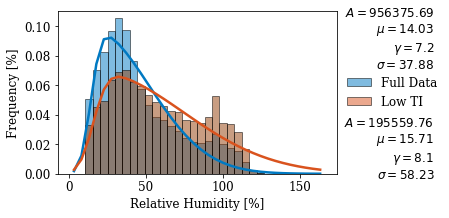

In [182]:
nrelcolors = utils.get_nrelcolors()
imp.reload(vis)

plotcats = ['air density',
            'air pressure',
            'air temperature',
            'relative humidity']

for cat in ['relative humidity']:
    
    height = 87
    if 'shear' in cat.lower():
        height = 110

    plotvar, _, _ = utils.get_vertical_locations(catinfo['columns'][cat], height)

    fulldat = metdat[plotvar].dropna().sort_values()
    lowtidat = lowTI[plotvar].dropna().sort_values()

    
    result = pd.concat([fulldat, lowtidat], axis=1)
    fig, ax = plt.subplots(figsize=(5,3))
    
    binwidth = np.round((fulldat.max()-fulldat.min())/35.0,decimals=3)
    bins = np.arange(fulldat.min(), fulldat.max(), binwidth)
    
    h1 = fulldat.plot.hist(bins = bins, 
                        color=nrelcolors['blue'][0],
                        edgecolor='k',
                        alpha=0.5,
                        ax=ax,
                        weights=np.ones(len(fulldat))/len(fulldat),
                        legend=False, label='fulldat')
    vis.fit_skewedgaussian(fulldat, bins=bins, ax=ax, basecolor='blue', xy = (1.35,1.025), gamma=0)
    
    h2 = lowtidat.plot.hist(bins = bins, 
                        color=nrelcolors['red'][0],
                        edgecolor='k',
                        alpha=0.5,
                        ax=ax,
                        weights=np.ones(len(lowtidat))/len(lowtidat), 
                        legend=False, label='lowti')
    vis.fit_skewedgaussian(lowtidat, bins=bins, ax=ax, basecolor='red', xy = (1.35,0.35), gamma=5)

    # proxy artists
    from matplotlib.patches import Rectangle
    handles = [Rectangle((0,0),1,1,color=c,ec="k",alpha=0.5) for c in [nrelblue,nrelred]]
    labels= ['Full Data', 'Low TI']
    plt.legend(handles, labels,frameon=False, loc=6, bbox_to_anchor=(1,0.5))
           
    ax.set_xlabel(catinfo['labels'][cat])
    ax.set_ylabel('Frequency [%]')
    
    fig.savefig(os.path.join(lowtifigpath,'LOWTI_{}_hist_comp.png'.format(catinfo['save'][cat])),dpi=200,bbox_inches='tight')
    
#     plt.clf()
    

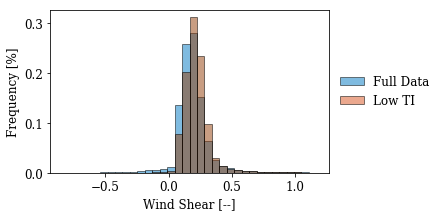

In [115]:
nrelcolors = utils.get_nrelcolors()

height = 87
if 'shear' in cat.lower():
    height = 110
cat = 'wind shear'
plotvar = 'Wind Shear (3_ 122 m)'

fulldat = metdat[plotvar].dropna().sort_values()
lowtidat = lowTI[plotvar].dropna().sort_values()

result = pd.concat([fulldat, lowtidat], axis=1)
fig, ax = plt.subplots(figsize=(5,3))

binwidth = np.round((fulldat.max()-fulldat.min())/35.0,decimals=3)
bins = np.arange(fulldat.min(), fulldat.max(), binwidth)

h1 = fulldat.plot.hist(bins = bins, 
                    color=nrelcolors['blue'][0],
                    edgecolor='k',
                    alpha=0.5,
                    ax=ax,
                    weights=np.ones(len(fulldat))/len(fulldat),
                    legend=False, label='fulldat')
#     vis.fit_skewedgaussian(fulldat, bins=bins, ax=ax, basecolor='blue', xy = (1.35,1.025), gamma=0)

h2 = lowtidat.plot.hist(bins = bins, 
                    color=nrelcolors['red'][0],
                    edgecolor='k',
                    alpha=0.5,
                    ax=ax,
                    weights=np.ones(len(lowtidat))/len(lowtidat), 
                    legend=False, label='lowti')
#     vis.fit_skewedgaussian(lowtidat, bins=bins, ax=ax, basecolor='red', xy = (1.35,0.35), gamma=5)

# proxy artists
from matplotlib.patches import Rectangle
handles = [Rectangle((0,0),1,1,color=c,ec="k",alpha=0.5) for c in [nrelblue,nrelred]]
labels= ['Full Data', 'Low TI']
plt.legend(handles, labels,frameon=False, loc=6, bbox_to_anchor=(1,0.5))

ax.set_xlabel(catinfo['labels'][cat])
ax.set_ylabel('Frequency [%]')

fig.savefig(os.path.join(lowtifigpath,'LOWTI_{}_hist_comp.png'.format(catinfo['save'][cat])),dpi=200,bbox_inches='tight')

#     plt.clf()
    

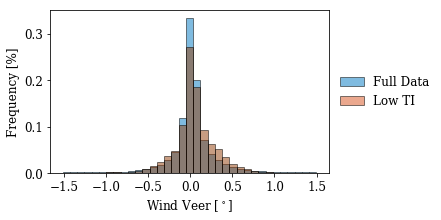

In [116]:
nrelcolors = utils.get_nrelcolors()

height = 87
if 'shear' in cat.lower():
    height = 110
cat = 'wind veer'
plotvar = 'Wind Veer (3_ 122 m)'

fulldat = metdat[plotvar].dropna().sort_values()
lowtidat = lowTI[plotvar].dropna().sort_values()

result = pd.concat([fulldat, lowtidat], axis=1)
fig, ax = plt.subplots(figsize=(5,3))

binwidth = np.round((fulldat.max()-fulldat.min())/35.0,decimals=3)
bins = np.arange(fulldat.min(), fulldat.max(), binwidth)

h1 = fulldat.plot.hist(bins = bins, 
                    color=nrelcolors['blue'][0],
                    edgecolor='k',
                    alpha=0.5,
                    ax=ax,
                    weights=np.ones(len(fulldat))/len(fulldat),
                    legend=False, label='fulldat')
#     vis.fit_skewedgaussian(fulldat, bins=bins, ax=ax, basecolor='blue', xy = (1.35,1.025), gamma=0)

h2 = lowtidat.plot.hist(bins = bins, 
                    color=nrelcolors['red'][0],
                    edgecolor='k',
                    alpha=0.5,
                    ax=ax,
                    weights=np.ones(len(lowtidat))/len(lowtidat), 
                    legend=False, label='lowti')
#     vis.fit_skewedgaussian(lowtidat, bins=bins, ax=ax, basecolor='red', xy = (1.35,0.35), gamma=5)

# proxy artists
from matplotlib.patches import Rectangle
handles = [Rectangle((0,0),1,1,color=c,ec="k",alpha=0.5) for c in [nrelblue,nrelred]]
labels= ['Full Data', 'Low TI']
plt.legend(handles, labels,frameon=False, loc=6, bbox_to_anchor=(1,0.5))

ax.set_xlabel(catinfo['labels'][cat])
ax.set_ylabel('Frequency [%]')

fig.savefig(os.path.join(lowtifigpath,'LOWTI_{}_hist_comp.png'.format(catinfo['save'][cat])),dpi=200,bbox_inches='tight')

#     plt.clf()
    

In [17]:
params.keys()

odict_keys(['sigma', 'center', 'amplitude', 'fwhm', 'height'])

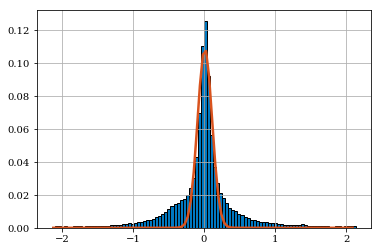

In [31]:
nbins = 100

data = metdat['Wind Veer (3_ 87 m)'].dropna()
binwidth = np.round((data.max()-data.min())/nbins,decimals=3)
bins = np.arange(data.min(), data.max(), binwidth)

yvals, xvals = np.histogram(data, bins=bins)
xvals = np.array([(xvals[i]+xvals[i+1])/2 for i in range(len(xvals)-1)])

params = model.make_params(sigma=np.std(data), center=np.mean(data), amplitude=1000000)
result = model.fit(yvals, params, x=xvals)

fig, ax = plt.subplots()
data.hist(ax=ax, color = nrelblue, edgecolor='k', weights=np.ones(len(data))/len(data), bins=nbins)
ax.plot(xvals, result.best_fit* 1.0/float(len(data)), color=nrelred, linewidth=2.5)
                   

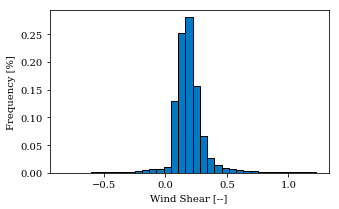

In [94]:
cats = catinfo['columns']['wind shear']


data = metdat[cats[1]].dropna()
fig, ax = plt.subplots(figsize=(5,3))
data.hist(ax=ax, color = nrelblue, edgecolor='k', weights=np.ones(len(data))/len(data), bins=35)
# ax.set_title(cat)
ax.grid(False)
ax.set_xlabel(catinfo['labels']['wind shear'])
ax.set_ylabel('Frequency [%]')
    
fig.savefig(os.path.join(figPath,'{}_3_122.png'.format(catinfo['save']['wind shear'])), dpi=200, bbox_inches='tight')
# fig, ax = vis.hist(metdat, catinfo, 'wind shear', vertloc=38) 

# yvals, xvals = np.histogram(data, bins=100)
# x = np.array([np.sum(xvals[ii:ii+1]) for ii in range(len(xvals[:-1]))])

# lower = np.argwhere(yvals < data.mean()-data.std())
# test = np.trapz(data)

In [85]:
lower = np.argmin(np.abs(yvals - (data.mean()-data.std())))

In [92]:
data.mean()

0.18937684435170452

In [79]:
print(np.round(data.mean(),3),np.round(data.std(),3))

0.189 0.141


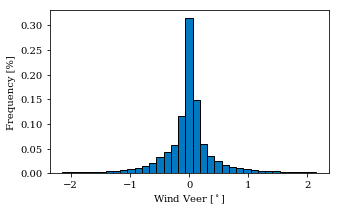

In [95]:
cats = catinfo['columns']['wind veer']

data = metdat[cats[2]].dropna()
fig, ax = plt.subplots(figsize=(5,3))
data.hist(ax=ax, color = nrelblue, edgecolor='k', weights=np.ones(len(data))/len(data), bins=35)
# ax.set_title(cat)
ax.grid(False)
ax.set_xlabel(catinfo['labels']['wind veer'])
ax.set_ylabel('Frequency [%]')

fig.savefig(os.path.join(figPath,'{}_3_122.png'.format(catinfo['save']['wind veer'])), dpi=200, bbox_inches='tight')


In [54]:
catinfo['save']['wind shear']

'wind_shear'

../vis.py:1070: PerformanceWarning: indexing past lexsort depth may impact performance.
  pdat = temp.loc[ii+1,cond]


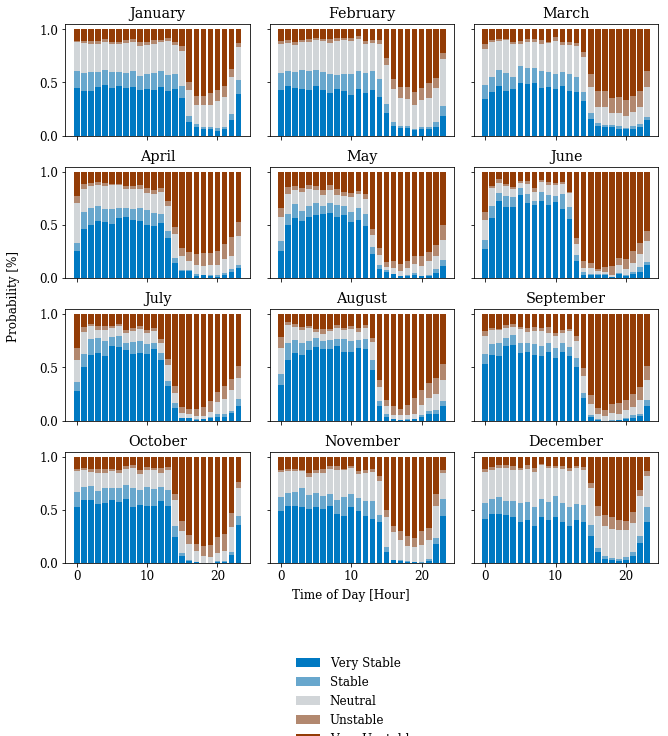

In [102]:
imp.reload(vis)
fig, ax = vis.normalized_monthly_hist_by_stability(metdat,catinfo)

In [120]:
1- np.round(len(lowTI)/len(fulldat),3)

0.7170000000000001